# **Practical 7: Pytorch Tutorial**

## **Installation**

Navigate to the official website: https://pytorch.org/

Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. This should be suitable for many users. Preview is available if you want the latest, not fully tested and supported, builds that are generated nightly. Please ensure that you have met the prerequisites below (e.g., numpy), depending on your package manager. Anaconda is our recommended package manager since it installs all dependencies.


For **CPU installation** run:

conda install pytorch torchvision torchaudio cpuonly -c pytorch


For **GPU installation** with CUDA 11.8 run:

conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

Note that GPU installation is possible only if you have a CUDA-capable GPU.

**Verify if You Have a CUDA-Capable GPU**:

You can verify that you have a CUDA-capable GPU through the Display Adapters section in the Windows Device Manager. Here you will find the vendor name and model of your graphics card(s). If you have an NVIDIA card that is listed in https://developer.nvidia.com/cuda-gpus, that GPU is CUDA-capable.


## **Tensor Operations**

In [4]:
import torch

In [5]:
# initialize empty tensors

# a tensors of dimension 3
x = torch.empty(3)
print(x)
print(x.size())

# a tensors of dimension 3x2
x = torch.empty(3, 2)
print(x)
print(x.size())

# a tensors of dimension 5x4x3x2
x = torch.empty(5, 4, 3, 2)
print(x.size())

tensor([0., 0., 0.])
torch.Size([3])
tensor([[1.4013e-45, 0.0000e+00],
        [5.9371e-05, 3.1053e-41],
        [5.9372e-05, 3.1053e-41]])
torch.Size([3, 2])
torch.Size([5, 4, 3, 2])


In [20]:
# initialize tensors from lists and show math operators

x = torch.tensor([34, 12, 19, 17], dtype=torch.float)
print('x', x)

y =  torch.tensor([26, 45, 3, 8], dtype=torch.float) # you can specify the type
print('y', y)

# addition
addition_result = x + y # torch.add(x, y)
print("\nAddition Result:", addition_result)

# subtraction
subtraction_result = x - y # torch.sub(x, y)
print("\nSubtraction Result:", subtraction_result)

# multiplication
multiplication_result = x * y # torch.mul(x, y)
print("\nMultiplication Result:", multiplication_result)

# division
division_result = x / y # torch.div(x, y)
print("\nDivision Result:", division_result)

# scalar product
scalar_product = torch.dot(x, y)
print("\nScalar Product:", scalar_product)

x tensor([34., 12., 19., 17.])
y tensor([26., 45.,  3.,  8.])

Addition Result: tensor([60., 57., 22., 25.])

Subtraction Result: tensor([  8., -33.,  16.,   9.])

Multiplication Result: tensor([884., 540.,  57., 136.])

Division Result: tensor([1.3077, 0.2667, 6.3333, 2.1250])

Scalar Product: tensor(1617.)


In [7]:
# initialize random tensors

torch.manual_seed(42) # set the seed for reproducibility

print('Uniform:')
x = torch.rand(3, 2) # random with uniform probability
print(x)

print('\nGaussian:')
x = torch.randn(3, 2) # random with gaussian probability
print(x)

Uniform:
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593],
        [0.3904, 0.6009]])

Gaussian:
tensor([[ 1.1561,  0.3965],
        [-2.4661,  0.3623],
        [ 0.3765, -0.1808]])


In [8]:
# conversion from tensor to numpy

tensor = torch.tensor([1, 2, 3, 4], dtype=torch.float32)

numpy_array = tensor.numpy()

print("NumPy array:", numpy_array)

NumPy array: [1. 2. 3. 4.]


In [9]:
# conversion from numpy to PyTorch tensor
import numpy as np

# Create a NumPy array
array = np.array([5, 6, 7, 8])

tensor_from_numpy = torch.from_numpy(array)

print("Tensor:", tensor_from_numpy)

Tensor: tensor([5, 6, 7, 8])


## **Gradient Computations through Autograd Package**

Consider a tensor x, initialized as a gaussian vector of dimension 3, and imagine we want to compute the gradient of a function of x with respect to x:

In [16]:
x = torch.ones(3, requires_grad=True) # add requires_grad
print('x', x)

y = x + 2 # create a computational graph with input x and 2 and output y
print('y', y) # we see the grad_fn attribute

z = 2*y**2 # create another computational graph
z = z.mean()
print('z', z)

# compute the gradient of z wth respect to x, i.e. dz/dx:
z.backward() # this produce an error if x has not requires_grad=True, and also works only if z is scalar
print('dz/dx', x.grad) #it has 3 components [dz/dx1, dz/dx2, dz/dx3]

# compute the gradient of a vector y with respect to x
# y.backward( torch.tensor([1.0, 1.0, 1.0], dtype=torch.float))

x tensor([1., 1., 1.], requires_grad=True)
y tensor([4., 4., 4.], grad_fn=<AddBackward0>)
z tensor(32., grad_fn=<MeanBackward0>)
dz/dx tensor([5.3333, 5.3333, 5.3333])


In machine learning, especially in the context of training neural networks, we primarily focus on computing the gradient of a scalar loss function with respect to the model's parameters. This is a fundamental step in the optimization process, typically performed using gradient descent or its variants.

The .backward() method in PyTorch computes the gradient of a scalar quantity (usually the loss) with respect to the tensors (parameters) that have requires_grad=True. When you try to call .backward() on a tensor that is not a scalar (i.e., a vector or matrix), PyTorch will raise an error unless you provide an argument to the .backward() call. This argument needs to specify how the gradients should be aggregated to produce a scalar quantity. This is because the .backward() method is designed to work with scalar quantities to perform gradient descent optimization.

The requirement for a scalar comes from the need to have a single value that represents the "objective" or "cost" that the optimization algorithm attempts to minimize. When dealing with non-scalar outputs, you must explicitly tell PyTorch how to handle them by specifying gradient arguments that effectively reduce the output to a scalar. This is often done by passing a gradient vector that matches the shape of the output, effectively performing a dot product that results in a scalar.

In [12]:
# if we want to perform some operations without requiring the gradient
with torch.no_grad():
    y = x + 2

print(y)

tensor([2.2303, 0.8771, 1.8137])


In [23]:
# avoid gradient accumulation within loops (for instance during gradient descent):
n_steps = 10
x = torch.ones(3, requires_grad=True) # add requires_grad

def forward(x):
  y = x + 2
  z = 2*y**2 # create another computational graph
  z = z.mean()
  return z

for i in range(n_steps):
    z = forward(x)
    z.backward()

    # w_next = w - alpha * w.grad

    print(x.grad)

    # x.grad.zero_() # to avoid gradient accumulation


tensor([4., 4., 4.])
tensor([8., 8., 8.])
tensor([12., 12., 12.])
tensor([16., 16., 16.])
tensor([20., 20., 20.])
tensor([24., 24., 24.])
tensor([28., 28., 28.])
tensor([32., 32., 32.])
tensor([36., 36., 36.])
tensor([40., 40., 40.])


## **Backpropagation**
Divided into 3 steps:
- forward pass;
- computation of local gradients;
- backward pass (using the chain rule)
  
Let's consider a function l = (w * x - y)^2, and we want to compute the gradient dl/dw.

We create the computational graph as:

q = w * x

s = q - y

l = s^2  

- With the forward pass we compute q, s and l;
- We compute the analytical expressions of the local gradients (d l / d s),  (d s / d q), (d q / d w) and we evaluate them in the computed q, s and l;
- we apply the Chain Rule -> d l / d w = (d l / d s)  (d s / d q)  (d q / d w)

Consider a numerical example with x=1, y=2, w=1:

Forward:
- q = w*x = 1
- s=q-y = -1
- l = s^2 = 1

Local Gradients:
- d l / ds = 2*s = -2
- d s / d q = 1
- d q / d w = x = 1

Backward (chain rule):
d l / d w  = -2 * 1 * 1 = -2

In [ ]:
# check LR example with PyTorch
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

l = (w*x-y)**2

l.backward()

print(w.grad)

tensor(-2.)


## **Linear Regression with Autograd**

Consider the real data distribution to be y = 2 * x

In [ ]:
X = torch.tensor([1,2,3,4], dtype = torch.float32)
y = 2 * X

# initialize the weights
w = torch.tensor(0.0, requires_grad=True)

def forward(x):
    return w*x

def loss_fun(y, y_pred):
    return ((y-y_pred)**2).mean()

print(f'Prediction before training: f(5) = {forward(5)}\n')

# training

lr = 0.01 #learning rate
n_epochs = 100

for epoch in range(n_epochs): # in each step i compute the mean loss over all the samples in the dataset

    # forward pass: prediction
    y_pred = forward(X)
    loss = loss_fun(y, y_pred)

    # gradient computations and backward pass
    loss.backward()

    # learn
    with torch.no_grad(): # this should not be part of the computational graph
        w -= lr * w.grad

    #zero gradients
    w.grad.zero_() #modified in place

    if epoch % 5 == 0:
        print(f'epoch {epoch}: w = {w}, loss = {loss}')

print(f'\nPrediction after training: f(5) = {forward(5)}')


Prediction before training: f(5) = 0.0

epoch 0: w = 0.29999998211860657, loss = 30.0
epoch 5: w = 1.2457009553909302, loss = 5.9062323570251465
epoch 10: w = 1.6653136014938354, loss = 1.1627856492996216
epoch 15: w = 1.8514978885650635, loss = 0.22892260551452637
epoch 20: w = 1.934108853340149, loss = 0.0450688973069191
epoch 25: w = 1.9707638025283813, loss = 0.008872910402715206
epoch 30: w = 1.987027645111084, loss = 0.0017468547448515892
epoch 35: w = 1.99424409866333, loss = 0.00034391897497698665
epoch 40: w = 1.9974461793899536, loss = 6.770494655938819e-05
epoch 45: w = 1.9988667964935303, loss = 1.3328777640708722e-05
epoch 50: w = 1.9994971752166748, loss = 2.6243997126584873e-06
epoch 55: w = 1.999776840209961, loss = 5.168862458049261e-07
epoch 60: w = 1.9999010562896729, loss = 1.0175587306093803e-07
epoch 65: w = 1.9999560117721558, loss = 2.0093764874218323e-08
epoch 70: w = 1.9999804496765137, loss = 3.9741685498029256e-09
epoch 75: w = 1.9999914169311523, loss = 7.7

Note: when updating model parameters with gradient descent, the operation itself does not need gradients because it’s an optimization step, not a part of the model’s forward or backward pass. torch.no_grad() ensures that these operations don't track gradients, which could otherwise lead to unnecessary computational overhead and potential confusion over why gradients are being computed for an update step.

## **Linear Regression with Loss and Optimizer**

In [ ]:
X = torch.tensor([1,2,3,4], dtype = torch.float32)
y = 2 * X

# initialize the weights
w = torch.tensor(0.0, requires_grad=True)

def forward(x):
    return w*x

print(f'Prediction before training: f(5) = {forward(5)}\n')

# training

lr = 0.01 #learning rate
n_epochs = 100

loss_fun = torch.nn.MSELoss() # Mean Square Error Loss
optimizer = torch.optim.SGD([w], lr=lr) # Stochastic Gradient Descent

for epoch in range(n_epochs): # in each step i compute the mean loss over all the samples in the dataset

    # forward pass: prediction
    y_pred = forward(X)
    loss = loss_fun(y, y_pred)

    #backward pass
    loss.backward()

    optimizer.step()

    #zero gradients
    optimizer.zero_grad() #modified in place

    if epoch % 5 == 0:
        print(f'epoch {epoch}: w = {w}, loss = {loss}')

print(f'\nPrediction after training: f(5) = {forward(5)}')

Prediction before training: f(5) = 0.0

epoch 0: w = 0.29999998211860657, loss = 30.0
epoch 5: w = 1.2457009553909302, loss = 5.9062323570251465
epoch 10: w = 1.6653136014938354, loss = 1.1627856492996216
epoch 15: w = 1.8514978885650635, loss = 0.22892260551452637
epoch 20: w = 1.934108853340149, loss = 0.0450688973069191
epoch 25: w = 1.9707638025283813, loss = 0.008872910402715206
epoch 30: w = 1.987027645111084, loss = 0.0017468547448515892
epoch 35: w = 1.99424409866333, loss = 0.00034391897497698665
epoch 40: w = 1.9974461793899536, loss = 6.770494655938819e-05
epoch 45: w = 1.9988667964935303, loss = 1.3328777640708722e-05
epoch 50: w = 1.9994971752166748, loss = 2.6243997126584873e-06
epoch 55: w = 1.999776840209961, loss = 5.168862458049261e-07
epoch 60: w = 1.9999010562896729, loss = 1.0175587306093803e-07
epoch 65: w = 1.9999560117721558, loss = 2.0093764874218323e-08
epoch 70: w = 1.9999804496765137, loss = 3.9741685498029256e-09
epoch 75: w = 1.9999914169311523, loss = 7.7

## **Linear Regression with Torch Model**

In [ ]:
X = torch.tensor([1,2,3,4], dtype = torch.float32)
X = X.reshape(4, 1) # 4 samples, 1 feature
y = 2 * X

x_test = torch.tensor(5, dtype = torch.float32)

n_samples, n_features = X.shape

# training
lr = 0.01 #learning rate
n_epochs = 1000

input_size = n_features
output_size = 1
model = torch.nn.Linear(input_size, output_size)
loss_fun = torch.nn.MSELoss() # Mean Square Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr=lr) # Stochastic Gradient Descent


for epoch in range(n_epochs): # in each step i compute the mean loss over all the samples in the dataset

    # forward pass: prediction
    y_pred = model(X)
    loss = loss_fun(y_pred, y)

    #backward pass
    loss.backward()

    optimizer.step()

    #zero gradients
    optimizer.zero_grad() #modified in place

    if epoch % 5 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch}: w = {w.item()}, loss = {loss}')

print(f'\nPrediction after training: f(5) = {forward(x_test)}')

epoch 0: w = 0.11748835444450378, loss = 25.420246124267578
epoch 5: w = 0.9429894089698792, loss = 4.403225898742676
epoch 10: w = 1.278558611869812, loss = 1.0133731365203857
epoch 15: w = 1.4175691604614258, loss = 0.4591057300567627
epoch 20: w = 1.4776818752288818, loss = 0.3612057864665985
epoch 25: w = 1.506087064743042, loss = 0.33697032928466797
epoch 30: w = 1.5217115879058838, loss = 0.3248346149921417
epoch 35: w = 1.5321474075317383, loss = 0.3148883283138275
epoch 40: w = 1.5404400825500488, loss = 0.3055303394794464
epoch 45: w = 1.5478122234344482, loss = 0.29649630188941956
epoch 50: w = 1.5547549724578857, loss = 0.287736713886261
epoch 55: w = 1.561466097831726, loss = 0.2792370915412903
epoch 60: w = 1.568026065826416, loss = 0.2709885835647583
epoch 65: w = 1.574467658996582, loss = 0.26298394799232483
epoch 70: w = 1.5808051824569702, loss = 0.25521570444107056
epoch 75: w = 1.5870451927185059, loss = 0.2476767748594284
epoch 80: w = 1.5931910276412964, loss = 0.2

## **ANN Example**

In [25]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
# Get the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape
print(n_samples, n_features)

569 30


In [27]:
# Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

X_train_scaled = torch.from_numpy(X_train_scaled.astype(np.float32))
X_test_scaled = torch.from_numpy(X_test_scaled.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

In [51]:
class SimpleANN(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleANN, self).__init__()
        # First hidden layer (linear transformation followed by ReLU)
        self.input_layer = torch.nn.Linear(input_size, hidden_size)
        # Output layer (linear transformation followed by sigmoid for binary classification)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Apply ReLU activation function after the first layer
        x = torch.nn.functional.relu(self.input_layer(x))
        # Apply the output layer
        x = self.output_layer(x)
        # Apply sigmoid activation function to get output probabilities
        # Note: If you're using nn.BCEWithLogitsLoss() for training, you should remove this sigmoid layer
        # and let the loss function apply it for numerical stability.
        x = torch.sigmoid(x)
        return x

lr = 0.01
model = SimpleANN(input_size=n_features, hidden_size=20)
loss_fun = torch.nn.BCELoss() # Binary Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=lr) # Stochastic Gradient Descent

n_epochs = 10000

# Lists to store accuracies
training_accuracies = []
testing_accuracies = []

# Lists to store loss values
training_losses = []
testing_losses = []
for epoch in range(n_epochs):

    model.train()
    # forward pass: prediction
    y_train_pred = model(X_train_scaled)
    train_loss = loss_fun(y_train_pred, y_train) # mean over all the samples

    #backward pass
    train_loss.backward()

    optimizer.step()

    #zero gradients
    optimizer.zero_grad() #modified in place


    # Compute training accuracy
    with torch.no_grad():
        y_predicted_train_class = y_train_pred.round()
        train_acc = y_predicted_train_class.eq(y_train).sum() / float(y_train.shape[0])

    # Evaluation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_pred_test = model(X_test_scaled)
        y_predicted_test_class = y_pred_test.round()
        test_acc = y_predicted_test_class.eq(y_test).sum() / float(y_test.shape[0])
        test_loss = loss_fun(y_pred_test, y_test)

    # Store accuracies
    training_accuracies.append(train_acc.item())
    testing_accuracies.append(test_acc.item())

    # Store losses
    training_losses.append(train_loss.item())
    testing_losses.append(test_loss.item())

    if epoch % 1000 == 0:
        print(f'epoch {epoch}: train_loss = {train_loss}, test_loss{test_loss}')

epoch 0: train_loss = 0.7691152691841125, test_loss0.7513837218284607
epoch 1000: train_loss = 0.08292501419782639, test_loss0.17408719658851624
epoch 2000: train_loss = 0.051871709525585175, test_loss0.14702516794204712
epoch 3000: train_loss = 0.0408908911049366, test_loss0.14192426204681396
epoch 4000: train_loss = 0.034955691546201706, test_loss0.1425352543592453
epoch 5000: train_loss = 0.031120499595999718, test_loss0.14412252604961395
epoch 6000: train_loss = 0.028222914785146713, test_loss0.14587010443210602
epoch 7000: train_loss = 0.02602395787835121, test_loss0.14802369475364685
epoch 8000: train_loss = 0.024250933900475502, test_loss0.15041904151439667
epoch 9000: train_loss = 0.022732121869921684, test_loss0.15254193544387817


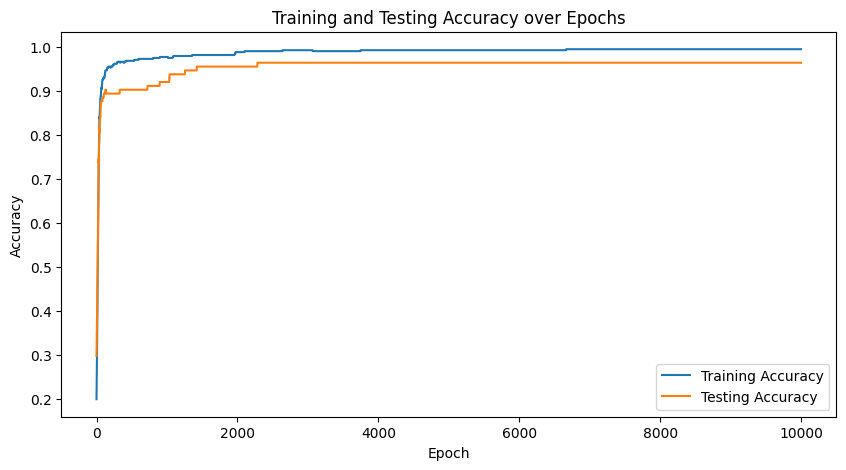

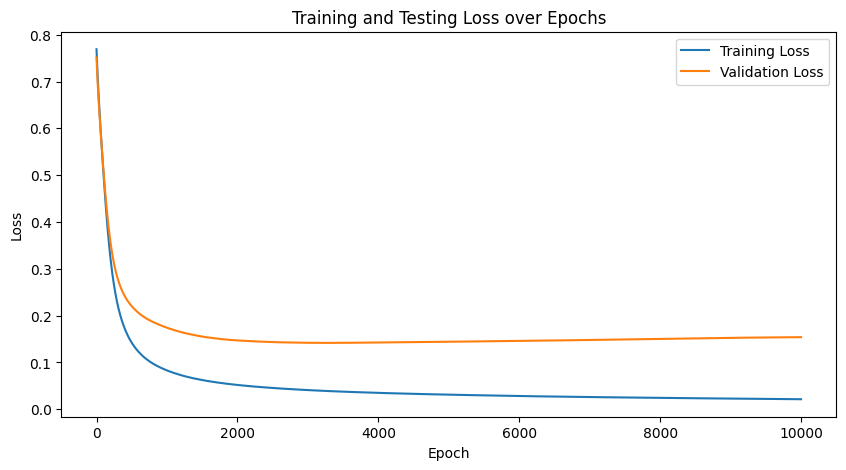

Accuracy in test: 0.9649122953414917


In [52]:
import matplotlib.pyplot as plt

# plotting accuracies
plt.figure(figsize=(10, 5))
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(testing_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy over Epochs')
plt.show()

#plotting losses
# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.plot(testing_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss over Epochs')
plt.show()

# printing testing accuracy
with torch.no_grad():
    y_pred_test = model(X_test_scaled)
    y_predicted_class = y_pred_test.round()
    acc = y_predicted_class.eq(y_test).sum()/float(y_test.shape[0])
print(f'Accuracy in test: {acc.item()}')

In [55]:
# to see the parameters
params = list(model.parameters())
# print(params)

params is a list containing all parameters of the model. You can access each parameter by indexing into this list. For example, params[0] and params[1] would correspond to the weight and bias of the first hidden layer, respectively, while params[2] and params[3] would correspond to the weight and bias of the output layer.

To avoid overfitting, implement EARLY STOPPING criteria:

In [ ]:
    # # Early stopping logic
    # if val_loss < best_val_loss:
    #     best_val_loss = val_loss.item()
    #     epochs_no_improve = 0
    #     best_model = copy.deepcopy(model.state_dict())
    # else:
    #     epochs_no_improve += 1

    # if epochs_no_improve == early_stop_threshold:
    #     print(f'Early stopping at epoch {epoch}. Restoring the model to the state with the best validation loss.')
    #     model.load_state_dict(best_model)
    #     break